# COVID-19 Detection on X-Ray Images

## 1. Importing the Training & Test Dataset

In [2]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

## 2. Buiding the CNN Architecture

In [5]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

## 3. Data Augmentation, Normalizing Data & Training the Model

In [7]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 0.9131 - accuracy: 0.4821 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.6577 - accuracy: 0.6250 - val_loss: 0.6253 - val_accuracy: 0.9167
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.4847 - accuracy: 0.8214 - val_loss: 0.3817 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 8s 1s/step - loss: 0.3330 - accuracy: 0.8438 - val_loss: 0.1983 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.2691 - accuracy: 0.8929 - val_loss: 0.4634 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.2889 - accuracy: 0.9062 - val_loss: 0.0946 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 8s 1s/step - loss: 0.2869 - accuracy: 0.8705 - val_l

In [12]:
model.save("model_adv.h5")

In [13]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.15199778974056244, 0.9464285969734192]

In [14]:
model.evaluate_generator(validation_generator)

[0.10266615450382233, 0.9666666388511658]

## 4. Model Evaluation

In [15]:
model = load_model('model_adv.h5')

In [16]:
import os

In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:
y_actual = []
y_test = []

In [19]:
from PIL import Image
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

### 4.1 Confusion Matrix

In [22]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_actual, y_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


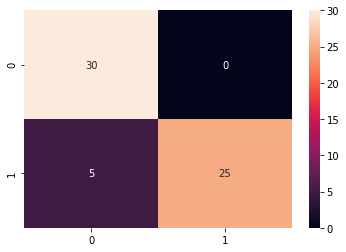

In [25]:
import seaborn as sns
sns.heatmap(cm, cmap=None, annot=True)

### 4.2 Plotting Training & Validation Loss

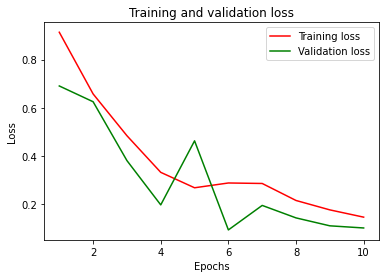

In [26]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4.3 Plotting Training & Validation Accuracy

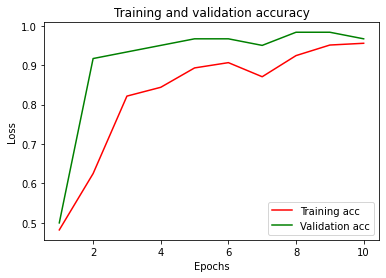

In [27]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 5. Some Comparative Results of Radiologist vs CNN Model on Validation set

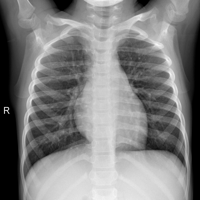

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


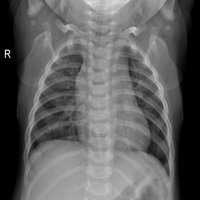

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


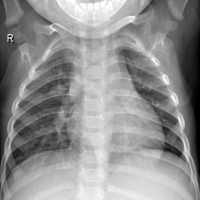

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


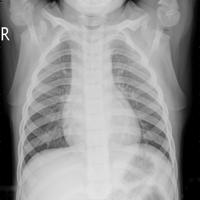

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


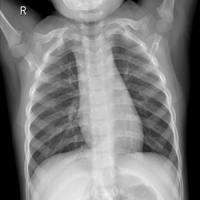

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


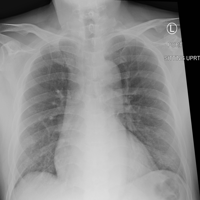

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


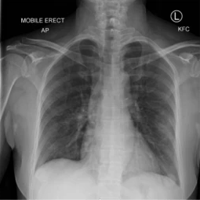

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


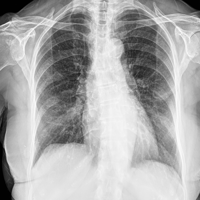

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


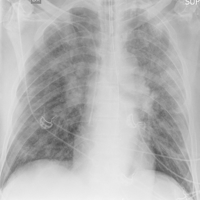

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


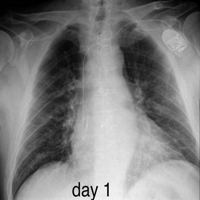

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [36]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("./CovidDataset/Val/Normal/"):
  j = j+1
  pil_img = Image.open('./CovidDataset/Val/Normal/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("./CovidDataset/Val/Covid/"):
  j = j+1
  pil_img = Image.open('./CovidDataset/Val/Covid/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break

*This Method has not been validated clinically and hence should not be used as it is in any clinical computer aided diagnosis system.*

